In [ ]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
import seaborn as sns
from matplotlib.pyplot import cm
# deep learning modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout
from tensorflow.keras import regularizers
# data preprocessing
from keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
npzfile = np.load('./drive/MyDrive/LSE/ST456_Deep_Learning/DL_Assignment/ST456_WT2024_data_assign1.npz')

# features
x_train = npzfile['x_train']
x_val = npzfile['x_val']
x_test = npzfile['x_test']

# one hot encoded labels
y_train = npzfile['y_train']
y_val = npzfile['y_val']
y_test = npzfile['y_test']

# numerical labels
y_train_num = npzfile['y_train_num']
y_val_num = npzfile['y_val_num']
y_test_num = npzfile['y_test_num']

In [ ]:
classes = ['classical', 'disco', 'metal', 'rock']

In [ ]:
# checking data structure
print("Shape of X_train:", x_train.shape)
print("Shape of X_test:" ,x_test.shape)
print("Shape of X_val:", x_val.shape)     # total data: 6000 spread into 66% train, 20% test, 14% validation

Shape of X_train: (3959, 80, 80, 1)
Shape of X_test: (1172, 80, 80, 1)
Shape of X_val: (869, 80, 80, 1)


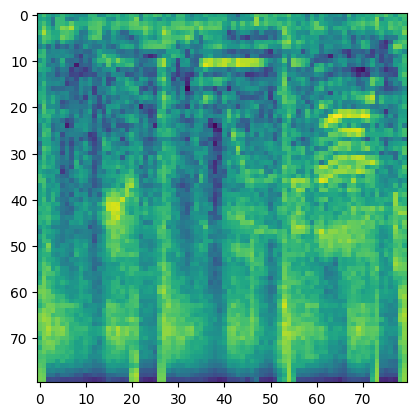

In [ ]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx])

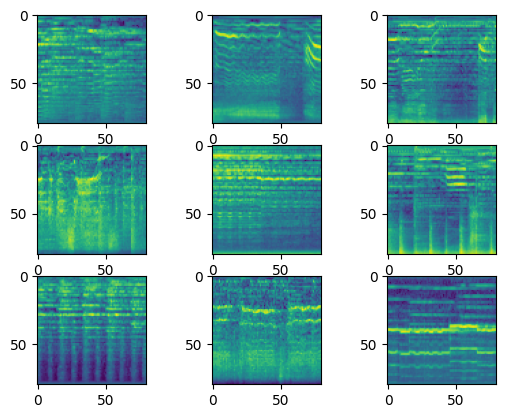

In [ ]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(x_train[i]) # add cmap=plt.get_cmap('gray') for greyscale
# show the figure
plt.show()

In [ ]:
# print first ten (integer valued) training labels
print('One-hot encoded labels: ')
print(y_train[:10])

# the first class corresponds to classical music
# the second to disco music
# the third to metal music
# the fourth to rock music

One-hot encoded labels: 
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


## P1 - CNN

In [ ]:
# Model definition and compilation

# Fixing the seeds for reproducibility
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

# Defining the CNN architecture
model = keras.models.Sequential([
    # 2D convolutional layer
    keras.layers.Conv2D(4, (5, 5), padding='same', activation='relu', input_shape=(80,80,1)),
    # 2D max pooling layer
    keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    # 2D convolutional layer
    keras.layers.Conv2D(8, (5, 5), padding='same', activation='relu'),
    # 2D max pooling layer
    keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    # 2D convolutional layer
    keras.layers.Conv2D(16, (5, 5), padding='same', activation='relu'),
    # 2D max pooling layer
    keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    # Flatten layer
    keras.layers.Flatten(),
    # Dense layer
    keras.layers.Dense(50, activation='relu', kernel_regularizer = keras.regularizers.l2(0.01)),
    # Output layer
    keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 80, 4)         104       
                                                                 
 max_pooling2d (MaxPooling2  (None, 40, 40, 4)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 8)         808       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 16)        3216      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 16)        0

**P1-1: How many parameters does the model train? Before performing the training, do you expect this model to overfit? Which aspects would influence the overfitting (or not) of this model?**

For the first Convolutional Layer:
Parameters = (5 * 5 * 1 + 1) * 4 = 104.
For the second Convolutional Layer:
Parameters = (5 * 5 * 4 + 1) * 8 = 808
, and third Convolutional Layer:
Parameters = (5 * 5 * 8 + 1) * 16 = 3,216.
Then, after maxpooling layer (which reduces the size to (10, 10, 16)), we flatten the inputs to be inputted into the Dense layer.
We have 1600 input neurons and 1 bias term for the dense layer input.

So, we have (1600 + 1) * 50 = 80,050 parameters.
In the next layer, we similarly have 51 * 4 = 204 parameters.

Summing all these up we have a total of 84,382 trainable parameters.

**Overfitting:**

There is a possibility of overfitting in the model due to the large number of trainable parameters, and the relatively smaller validation dataset.

While the model includes regularization and the training set size is reasonable, the model's complexity and the relatively smaller size of the validation and test sets suggest that overfitting is a possibility. The effectiveness of regularization and the training procedure will play crucial roles in mitigating this risk.

The following aspects would influence overfitting (or not) of this model:-

1. **Model Complexity**:
   - The model has three convolutional layers followed by max-pooling layers, a flatten layer, a dense layer with 50 neurons, and an output layer with 4 neurons.
   - The total number of trainable parameters is 84,382, which is relatively large. This complexity could potentially lead to overfitting, especially if the model capacity exceeds what is necessary to capture the underlying patterns in the data.

2. **Dataset Size**:
   - The training set contains 3959 examples, the validation set contains 869 examples, and the test set contains 1172 examples.
   - While the training set is of reasonable size, the validation and test sets are relatively smaller. Smaller validation and test sets might not fully represent the variability in the data, which could impact the model's ability to generalize.

3. **Regularization**:
   - The model includes L2 regularization with a penalty of 0.01 applied to the dense layer. Regularization helps prevent overfitting by penalizing large weights in the model. This might dampen the effect of having a large number of trainable parameters.

4. **Optimization Algorithm**:
   - The model is compiled using stochastic gradient descent (SGD) as the optimizer. The choice of optimizer and its hyperparameters can influence the training dynamics and, consequently, the risk of overfitting.

5. **Training epochs**:
   - Training the model for 20 epochs allows it to learn from the training data over multiple iterations. However, it also increases the risk of overfitting if the model starts to memorize noise or outliers in the training set.

Hence, the model might have some overfitting on the (unseen) test data, but it will not be that large.

In [ ]:
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

# epochs of training
n_epochs = 20

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
# using categorical_crossentropy since we have labels in a one-hot representation
history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=32, validation_data = (x_val, y_val))

Epoch 1/20
124/124 [==============================] - 23s 176ms/step - loss: 2.0292 - acc: 0.4971 - val_loss: 2.0783 - val_acc: 0.4925
Epoch 2/20
124/124 [==============================] - 18s 149ms/step - loss: 1.6543 - acc: 0.6908 - val_loss: 1.6249 - val_acc: 0.6858
Epoch 3/20
124/124 [==============================] - 18s 145ms/step - loss: 1.5079 - acc: 0.7300 - val_loss: 1.4574 - val_acc: 0.7296
Epoch 4/20
124/124 [==============================] - 19s 152ms/step - loss: 1.4307 - acc: 0.7487 - val_loss: 1.3984 - val_acc: 0.7560
Epoch 5/20
124/124 [==============================] - 18s 143ms/step - loss: 1.3398 - acc: 0.7749 - val_loss: 1.3236 - val_acc: 0.7756
Epoch 6/20
124/124 [==============================] - 18s 144ms/step - loss: 1.2574 - acc: 0.7921 - val_loss: 1.2940 - val_acc: 0.7699
Epoch 7/20
124/124 [==============================] - 19s 157ms/step - loss: 1.2096 - acc: 0.7969 - val_loss: 1.1932 - val_acc: 0.7871
Epoch 8/20
124/124 [==============================] - 1

**P1-2: Plot the loss function and the accuracy per epoch for the train and validation sets.**

Text(0.5, 0.98, 'Music Genre Classification')

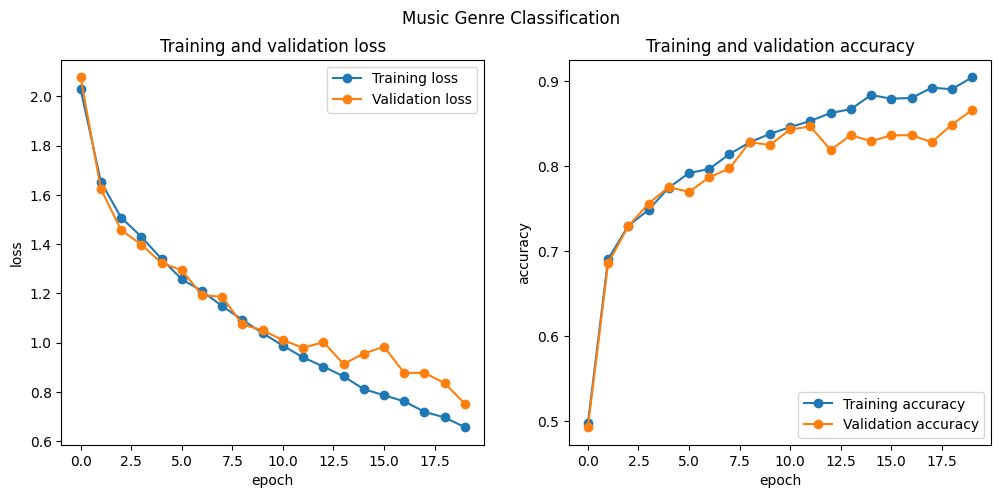

In [ ]:
# training and validation loss
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(history.history['loss'],'-o', label='Training loss')
ax1.plot(history.history['val_loss'],'-o', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(loc='upper right')
ax2.plot(history.history['acc'],'-o', label='Training accuracy')
ax2.plot(history.history['val_acc'],'-o', label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(loc='lower right')
f.suptitle('Music Genre Classification')

We can observe that towards the later epochs, the training accuracy is greater than the validation accuracy, and the validation loss is greater than the training loss. Hence the model is overfitting slightly.

**P1-3: Which accuracy do you obtain on the test set?**

In [ ]:
# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]
# print test accuracy
print('Test accuracy obtained on the test set: %.2f%%' % accuracy)

Test accuracy obtained on the test set: 87.37%


In [ ]:
# evaluate train accuracy
score = model.evaluate(x_train, y_train, verbose=0)
accuracy = 100*score[1]
# print train accuracy
print('Train accuracy obtained on the train set: %.2f%%' % accuracy)

Train accuracy obtained on the train set: 92.30%


In [ ]:
model.save_weights('./drive/MyDrive/LSE/ST456_Deep_Learning/DL_Assignment/model_weights_v3')

In [ ]:
# # we can call back the model by downloading the saved checkpoint

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

# Defining the CNN architecture
model = keras.models.Sequential([
    # 2D convolutional layer
    keras.layers.Conv2D(4, (5, 5), padding='same', activation='relu', input_shape=(80,80,1)),
    # 2D max pooling layer
    keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    # 2D convolutional layer
    keras.layers.Conv2D(8, (5, 5), padding='same', activation='relu'),
    # 2D max pooling layer
    keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    # 2D convolutional layer
    keras.layers.Conv2D(16, (5, 5), padding='same', activation='relu'),
    # 2D max pooling layer
    keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    # Flatten layer
    keras.layers.Flatten(),
    # Dense layer
    keras.layers.Dense(50, activation='relu', kernel_regularizer = keras.regularizers.l2(0.01)),
    # Output layer
    keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

# then we load the weights
model.load_weights('./drive/MyDrive/LSE/ST456_Deep_Learning/DL_Assignment/model_weights_v3')

**P1-4: Using the function plot_confusion_matrix plot the confusion matrices of the classification task on the train set and test set. What do you observe from this metric? Which classes display more correct predictions? And wrong?**

In [ ]:
# Plot the confusion matrix of the classification task

# actual: true labels, given as a list of numerical values from 0 to num_classes - 1 (not one-hot encoded)
# predicted: predictions, given as a list of numerical values from 0 to num_classes - 1 (not one-hot encoded)
# labels: list of strings with the name of the classes

def plot_confusion_matrix(actual, predicted, labels):
  cm = tf.math.confusion_matrix(actual, predicted)
  ax = sns.heatmap(cm, annot=True, fmt='g')
  sns.set(rc={'figure.figsize':(8, 8)})
  sns.set(font_scale=1.4)
  ax.set_xlabel('Predicted class')
  ax.set_ylabel('Actual class')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

37/37 [==============================] - 2s 44ms/step


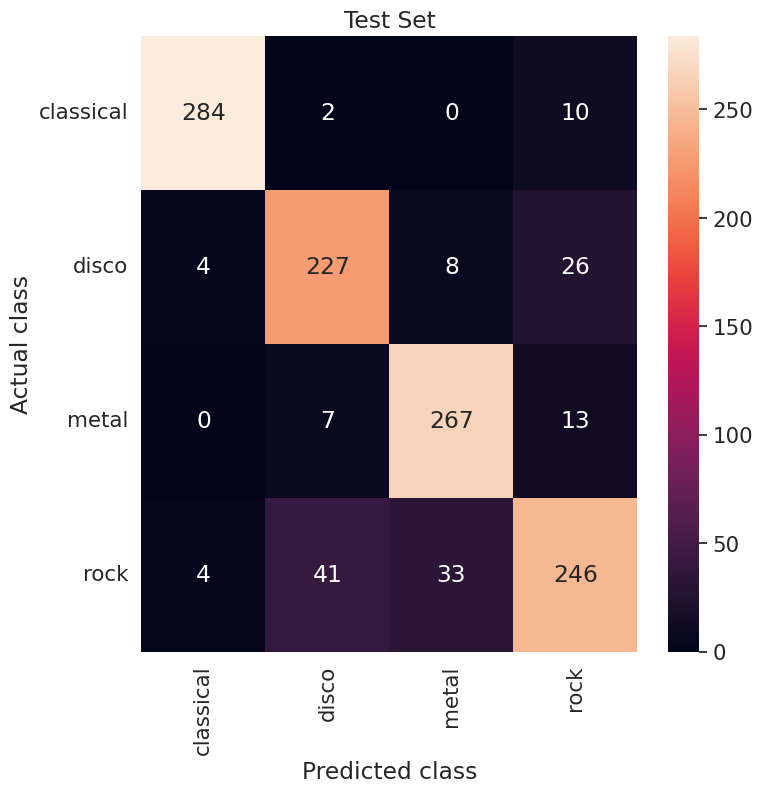

In [ ]:
predictions = model.predict(x_test)
plt.title("Test Set")
# np.argmax() converts one-hot encoded labels into classes 0,1,2,3
plot_confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), classes)
plt.show()

124/124 [==============================] - 7s 55ms/step


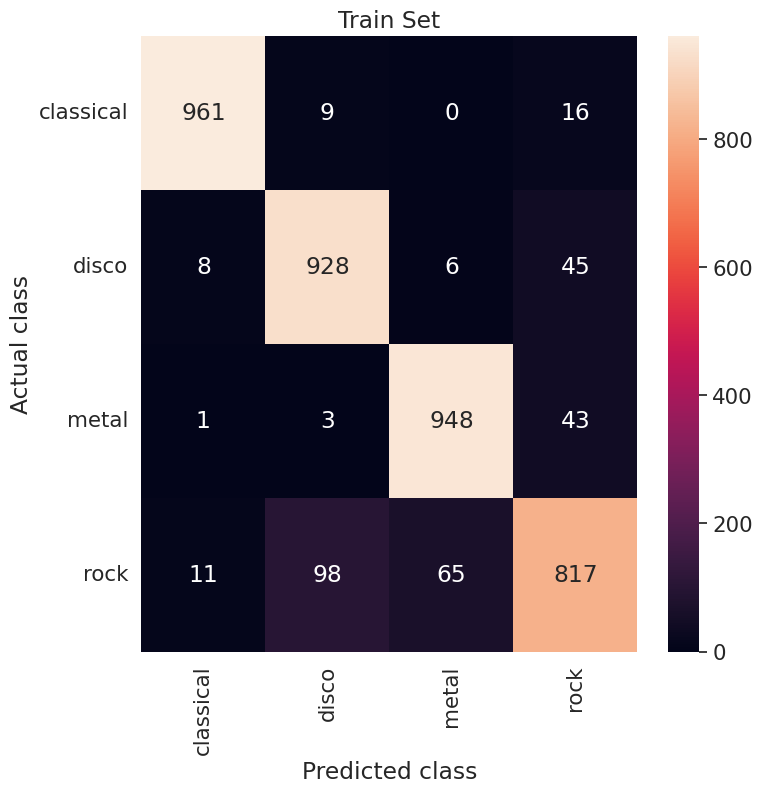

In [ ]:
predictions_train = model.predict(x_train)
plt.title("Train Set")
plot_confusion_matrix(np.argmax(y_train, axis=1), np.argmax(predictions_train, axis=1), classes)
plt.show()

The confusion matrix metric gives us a good idea about what classes are doing well in the model, and what classes are being wrongly classified as the model most often. It is also showing us a few classes that the model is frequently getting confused about (and predicted one of them instead of the other multiple times). We can judge exactly what number of observations are correctly classified by looking at the diagonal elements of the confusion matrix. All the non-diagonal elements show the number of misclassifications, and all the diagonal elements show the correctly classified number of observations.


**Test Set:** In the test set, the model is often misclassifying rock as disco (41 observations), and vice versa (26 observations). It might be interpretting the Mel spectograms of the 2 genres to be relatively similar which is the reason for this frequent misclassification.
A similar trend is also seen in rock and metal. Where the model often misclassifies rock as metal (33 observations).

Classical Music is the most correctly classified genre in the test set with the diagonal element showing 284 observations being correctly classified as classical, whereas Disco has the least correct predictions (227 observations).

**Train Set:** In the train set as well we see a very similar trend, with classical music being the most correctly classified class (961 times). In the train set as well, rock is being misclassified as disco a lot (98 times) and metal (65 times). In the train set, rock music is the most wrongly classified class.

So overall we see that in both datasets Classical genre is correctly classified the most number of times. Whereas rock and disco music generally has many wrong predictions.

### Defining all relevant functions:

In [ ]:
# Per class, extract the indexes of correctly and uncorrectly predicted data points

# model: name of the model
# x_train: training data
# ind_class: for which class do you want to observe the wrong predictions? Give it as a numeric value, not a string

def ind_correct_uncorrect(model, x_train, ind_class):
  ind = np.where(np.argmax(y_train, axis=1) == ind_class)[0]
  ind_correct = []
  ind_uncorrect = []
  preds = model.predict(x_train[ind], verbose=0)
  for i in range(len(ind)):
    if np.argmax(preds[i]) == np.argmax(y_train[ind[i]]):
      ind_correct.append(ind[i])
    else:
      ind_uncorrect.append(ind[i])
  return ind_correct, ind_uncorrect

In [ ]:
# Per class, plot a given number (i_max * j_max) of spectrograms

# i_max: number of rows of subplots
# j_max: number of columns of subplots
# x_train: training data
# ind_plot: indexes of the data points that you want to plot

def plot_spectrograms(i_max, j_max, x_train, ind_plot):
  fig, axs = plt.subplots(i_max, j_max, figsize=plt.figaspect(0.5))
  for i in range(i_max):
    for j in range(j_max):
      ind = ind_plot[i*j_max+j]
      axs[i, j].imshow(x_train[ind])
      axs[i, j].grid(False)
  fig.show()

In [ ]:
# Per class, print the predictions of those points that were wrongly classified

# model: name of the model
# x_train: training data
# y_train: training labels, one hot encoded
# ind_wrong: indexes of wrongly predicted points
# ind_class: for which class do you want to observe the wrong predictions? Give it as a numeric value, not a string
# labels: list of strings with the name of the classes

def print_wrong_prediction(model, x_train, y_train, ind_wrong, ind_class, labels):
  print('Wrongly predicted points for true class', labels[ind_class])
  for i in range(len(ind_wrong)):
    preds = model.predict(tf.expand_dims(x_train[ind_wrong[i]], axis=0), verbose=0)
    if np.argmax(preds) != np.argmax(y_train[ind_wrong[i]]):
      print('predicted class is', labels[np.argmax(preds)])


In [ ]:
# Compute Grad-CAM heatmap for a given data point and a hidden layer

# imag_array: image (represented as array) on which the heatmap will be produced
# model: name of the model
# layer_name: name of the layer on which the heatmap will be computed

def make_gradcam_heatmap(img_array, model, layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
# Per class, plot a given number (i_max * j_max) of Grad-CAM heatmaps

# i_max: number of rows of subplots
# j_max: number of columns of subplots
# x_train: training data
# ind: indexes of the wrongly predicted data for that class
# model: name of model
# layer_name: name of layer on which to compute Grad-CAM

def plot_gradcam_spectrogram(i_max, j_max, x_train, ind, model, layer_name):
  fig, axs = plt.subplots(i_max, j_max, figsize=plt.figaspect(0.5))
  for i in range(i_max):
    for j in range(j_max):
      ind_ = ind[i*j_max+j]
      heatmap = make_gradcam_heatmap(tf.expand_dims(x_train[ind_], axis=0), model, layer_name)
      axs[i, j].matshow(heatmap)
      axs[i, j].grid(False)
  fig.show()

## **P1-5:**
**Using the function ind_correct_uncorrect extract the indexes of the training data that were predicted correctly and incorrectly, per each class.**

## Classical Music

In [ ]:
classical = ind_correct_uncorrect(model, x_train, 0) # for class classical

In [ ]:
# for v2 model
print("Number of correctly classified in Classical genre", len(ind_correct_uncorrect(model, x_train, 0)[0])) # for class classical
print("Number of incorrectly classified in Classical genre", len(ind_correct_uncorrect(model, x_train, 0)[1])) # for class classical

Number of correctly classified in Classical genre 961
Number of incorrectly classified in Classical genre 25


## **P1-5 (a)**
Using the function plot_spectrograms plot the 12 mel spectrograms of the first 6 data points which were predicted correctly and the first 6 which were predicted wrongly. Do you observe some differences among music genres?

Correct Classification

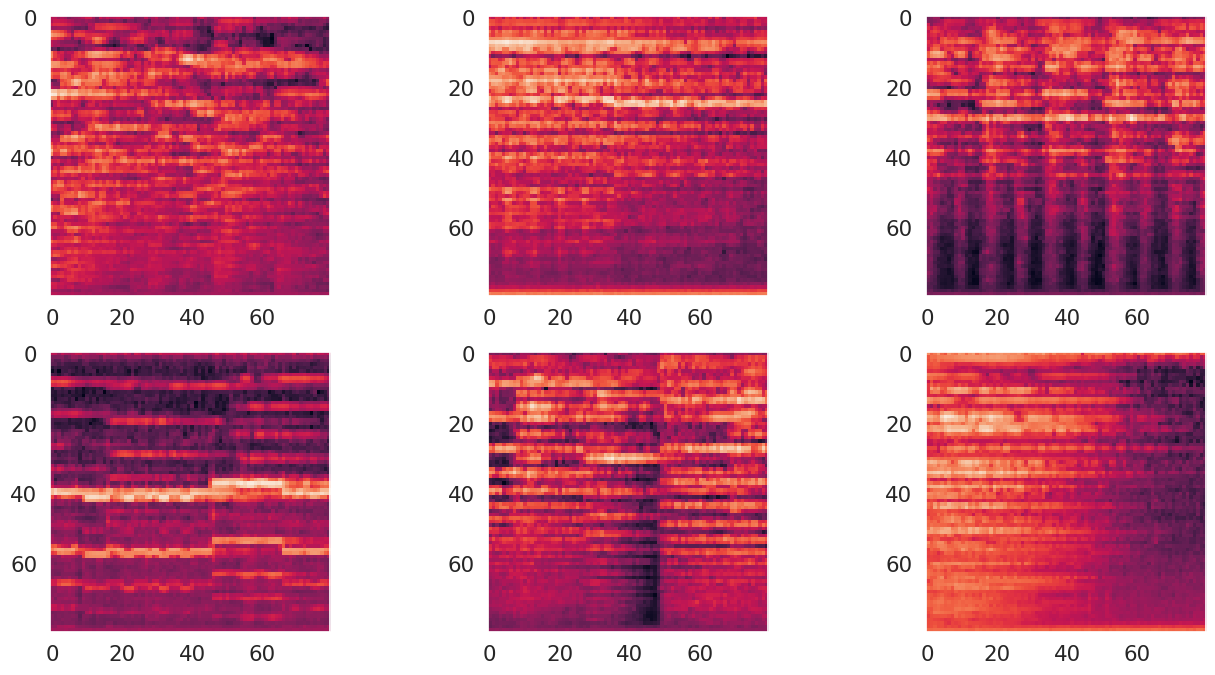

In [ ]:
plot_spectrograms(2, 3, x_train, classical[0][:6])

Incorrect Classification

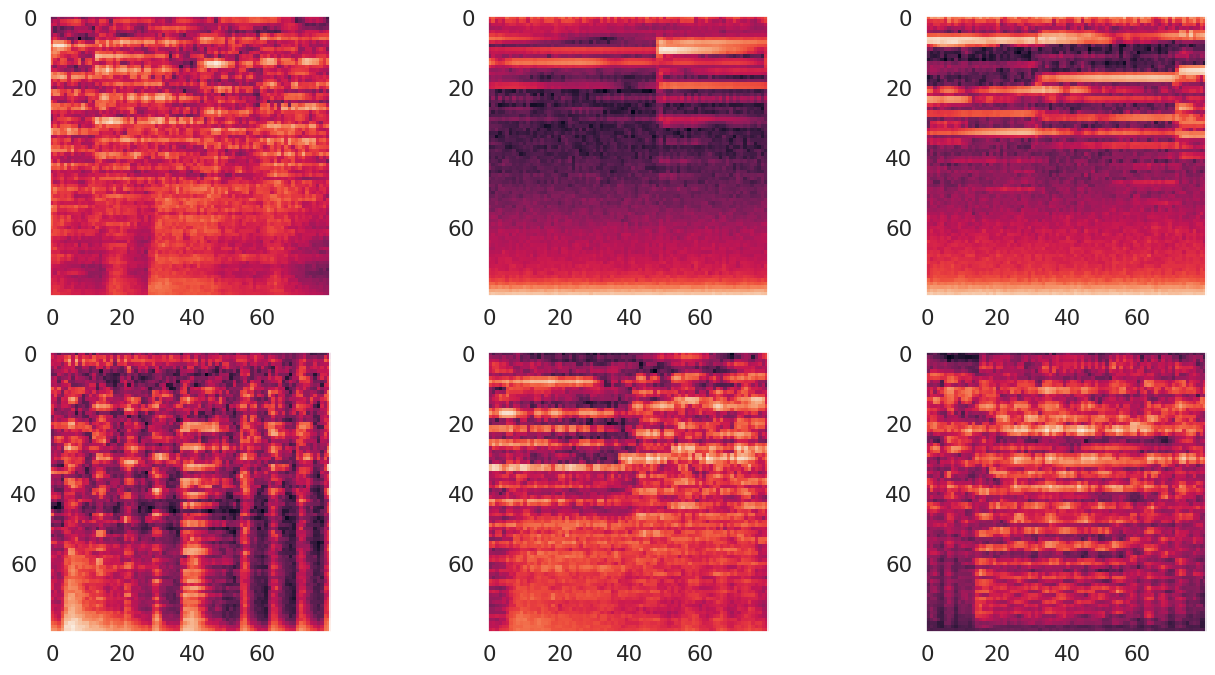

In [ ]:
plot_spectrograms(2, 3, x_train, classical[1][:6])

# all of these are CLASSICAL music mel spectograms, but they are predicted as rock (from the print_wrong_prediction fn)

## Disco Music

In [ ]:
disco = ind_correct_uncorrect(model, x_train, 1) # for class disco

In [ ]:
print("Number of correctly classified in Disco genre:", len(ind_correct_uncorrect(model, x_train, 1)[0])) # for class classical
print("Number of incorrectly classified in Disco genre:", len(ind_correct_uncorrect(model, x_train, 1)[1])) # for class classical

Number of correctly classified in Disco genre: 928
Number of incorrectly classified in Disco genre: 59


Correct Classification

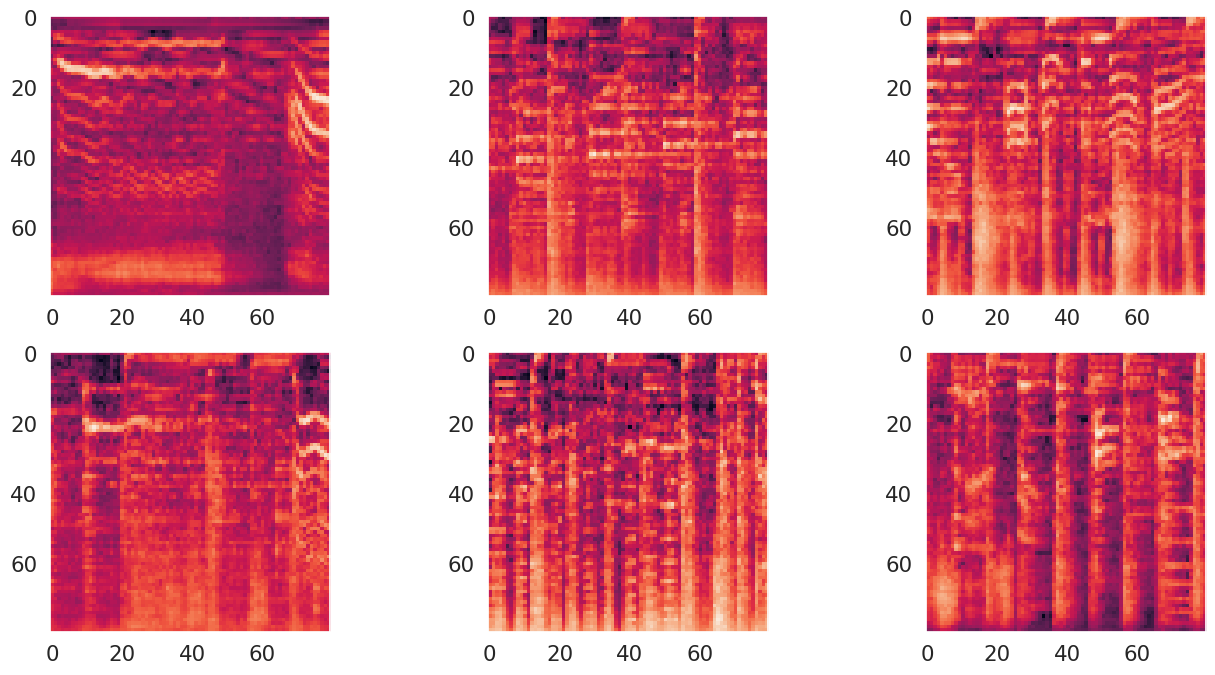

In [ ]:
plot_spectrograms(2, 3, x_train, disco[0][:6])

# disco genre has fewer dark patches (i.e. higher decibels at all times)

Incorrect Classification

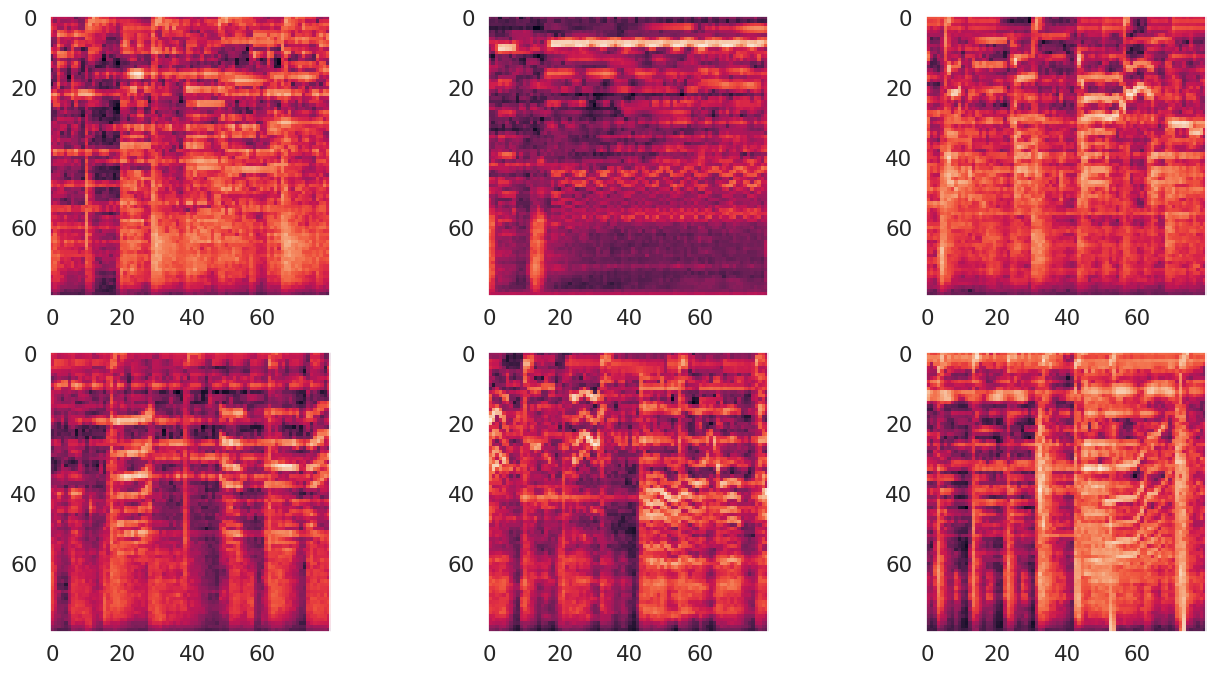

In [ ]:
plot_spectrograms(2, 3, x_train, disco[1][:6])

## Metal Music

In [ ]:
metal = ind_correct_uncorrect(model, x_train, 2) # for class disco

In [ ]:
print("Number of correctly classified in Metal genre:", len(ind_correct_uncorrect(model, x_train, 2)[0])) # for class classical
print("Number of incorrectly classified in Metal genre:", len(ind_correct_uncorrect(model, x_train, 2)[1])) # for class classical

Number of correctly classified in Metal genre: 948
Number of incorrectly classified in Metal genre: 47


Correct Classification

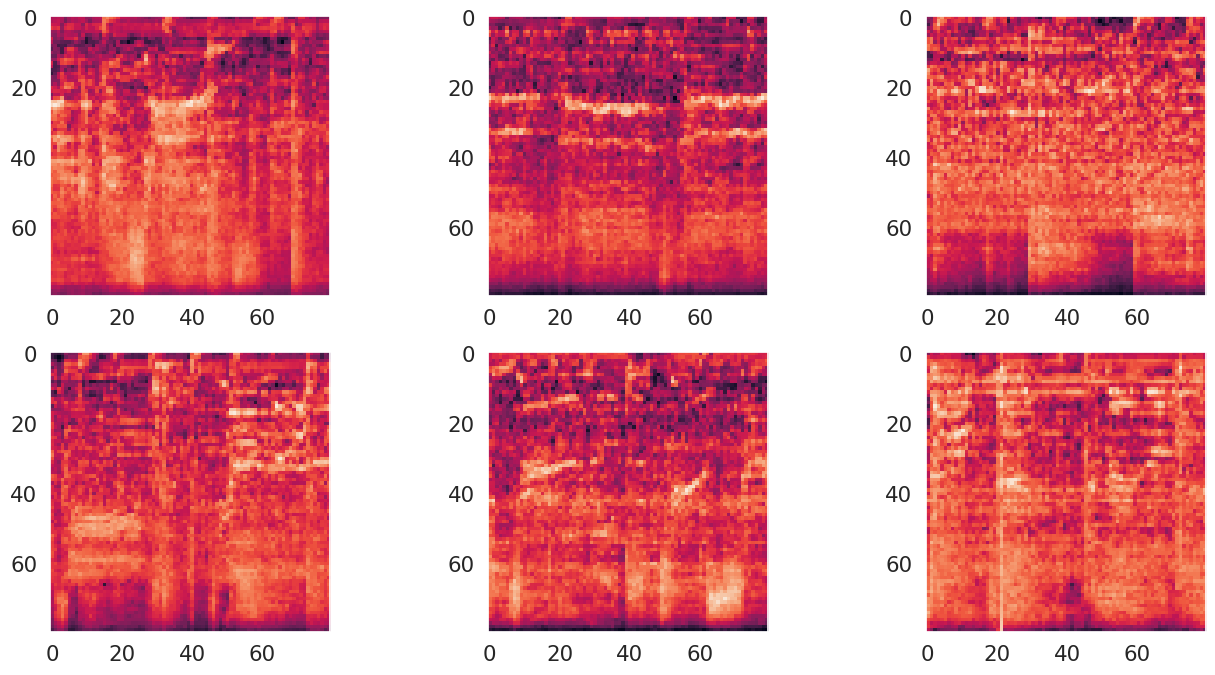

In [ ]:
plot_spectrograms(2, 3, x_train, metal[0][:6])

# metal music has very little dark patches. Most of it is relatively lighter, and it stays that way over time.

Incorrect Classification

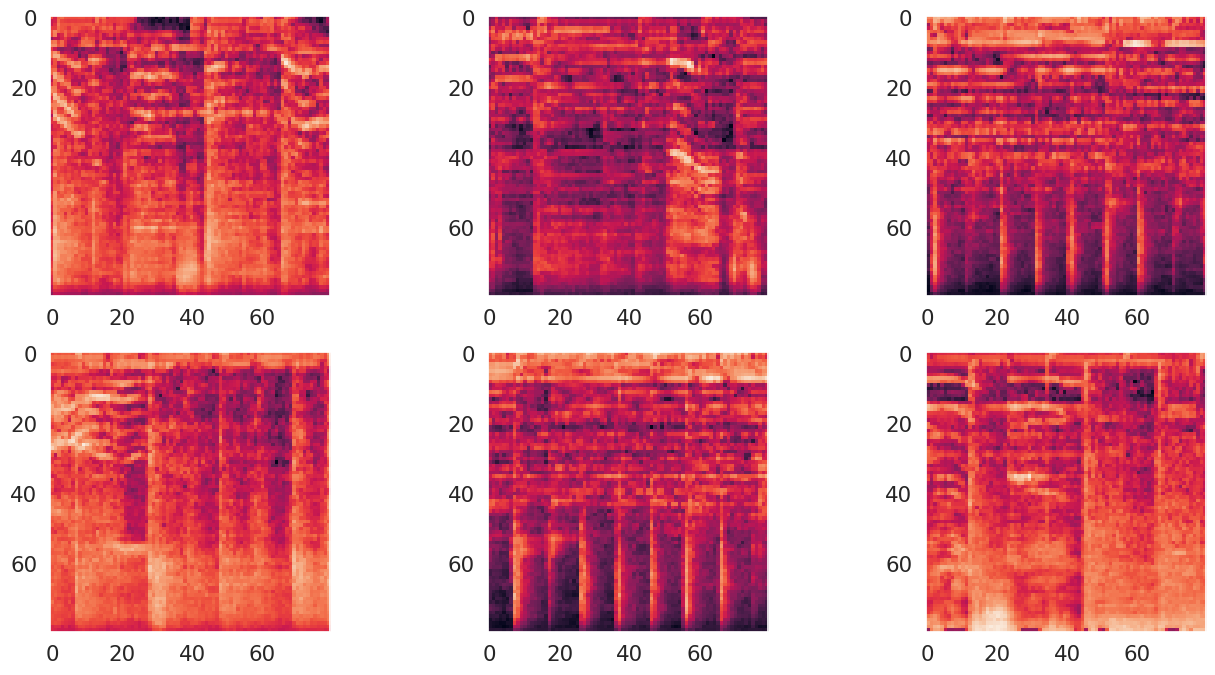

In [ ]:
plot_spectrograms(2, 3, x_train, metal[1][:6])

## Rock Music

In [ ]:
rock = ind_correct_uncorrect(model, x_train, 3) # for class rock

In [ ]:
print("Number of correctly classified in Rock genre:", len(ind_correct_uncorrect(model, x_train, 3)[0]))
print("Number of incorrectly classified in Rock genre:", len(ind_correct_uncorrect(model, x_train, 3)[1]))

Number of correctly classified in Rock genre: 817
Number of incorrectly classified in Rock genre: 174


Correct Classification

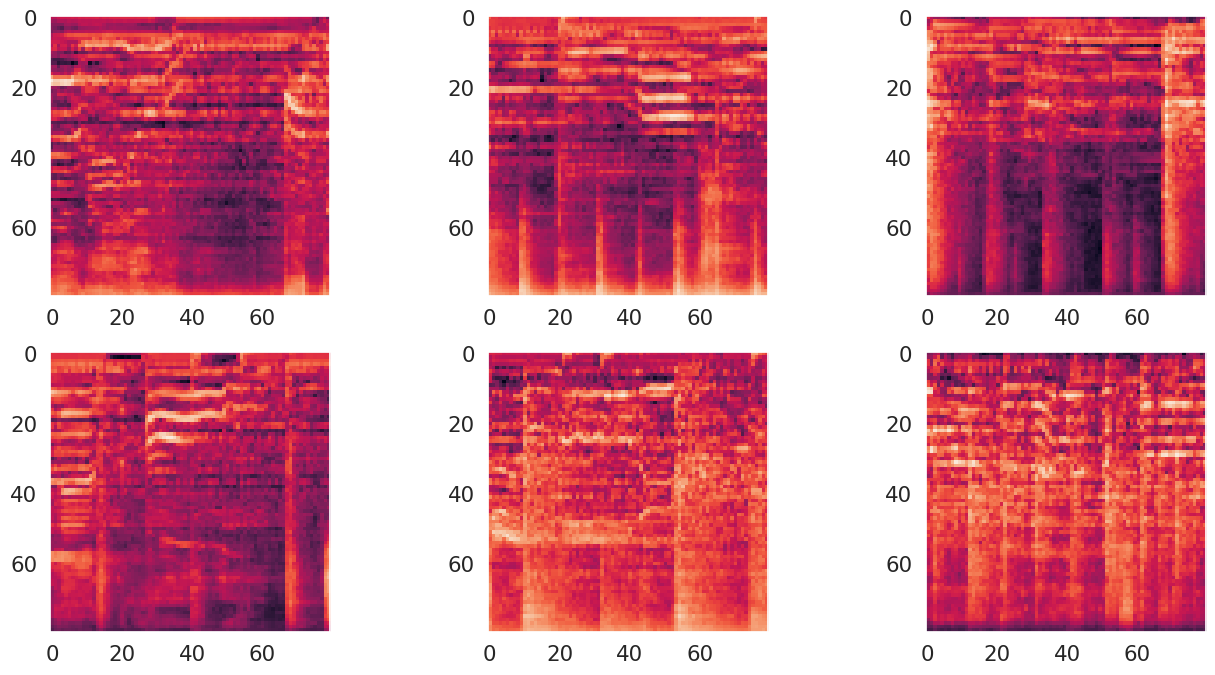

In [ ]:
plot_spectrograms(2, 3, x_train, rock[0][:6])

# rock music has slight periodic decibel shifts over time. This is probably beats and other musical variations.
# It has more dark patches (i.e. lower decibels) as compared to metal. But still lesser dark patches as compared to classical music.

Incorrect Classification

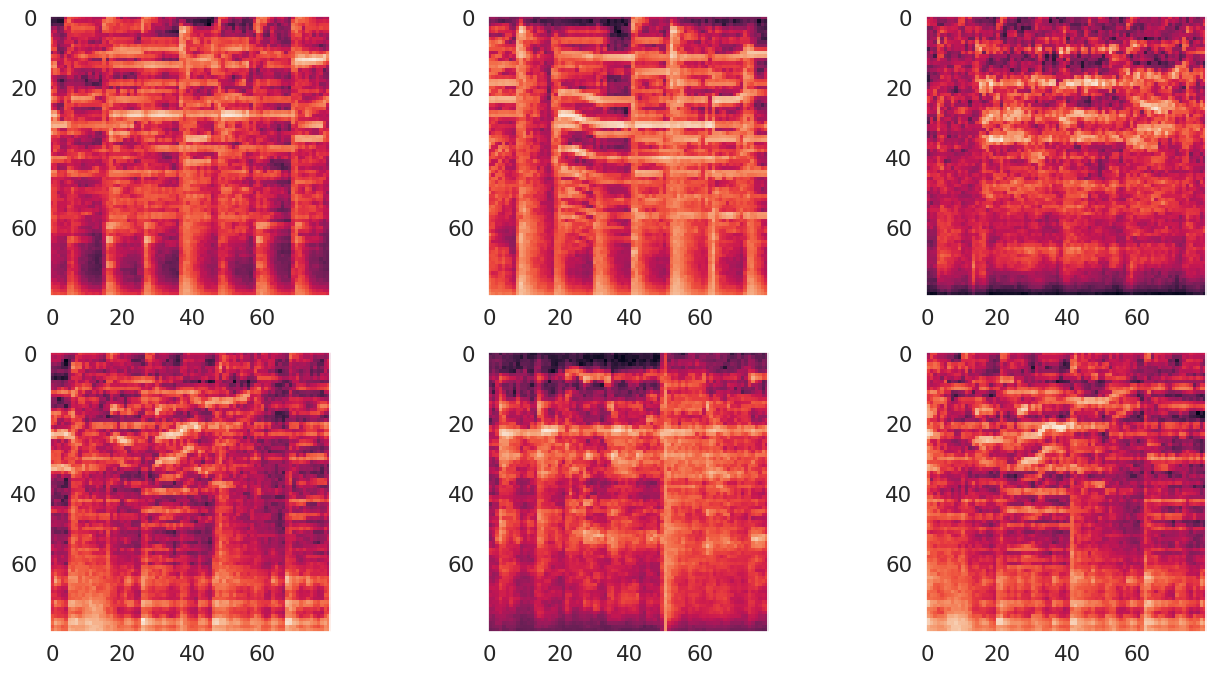

In [ ]:
plot_spectrograms(2, 3, x_train, rock[1][:6])

## **Differences in mel spectograms of different music genres:**

We can observe that classical music has more dark patches, i.e. lower decibels as compared to other genres since the darker shades correspond to lower decibels. They also show slight fluctuations in decibles over different times and frequencies. There is overall more pattern and variation in classical music decibels over different times and frequencies as compared to other genres, since we can observe waves of light and dark points along the time and frequency axis.

As compared to classical music, Disco genre graphs have fewer dark patches (i.e. higher decibels throughout all times). We also see a more frequent pattern in waves, i.e. the waves are more prominent and fluctuate more in shorter time intervals as compared to classical music.

Metal music has the least amount of dark patches (especially in the correctly classified examples). Most of the chart is relatively lighter, and it stays that way over time, suggesting that metal music is pretty loud throughout the entirety of an audio clip, with more focus on loud music rather than a rythemic pattern such as in classical or disco.

Rock music has slight periodic decibel shifts over time. This is probably due to the beats and other musical variations. It has more dark patches (i.e. lower decibels) as compared to metal. But still lesser dark patches as compared to classical music.


## **P1-5 (b)**
**Using the function print_wrong_prediction print the predicted classes of the first 6 data points which were predicted wrongly.**


In [ ]:
print_wrong_prediction(model, x_train, y_train, classical[1][:6], 0, classes)

Wrongly predicted points for true class classical
predicted class is rock
predicted class is rock
predicted class is rock
predicted class is disco
predicted class is rock
predicted class is disco


In [ ]:
print_wrong_prediction(model, x_train, y_train, disco[1][:6], 1, classes)

Wrongly predicted points for true class disco
predicted class is rock
predicted class is rock
predicted class is metal
predicted class is rock
predicted class is rock
predicted class is rock


In [ ]:
print_wrong_prediction(model, x_train, y_train, metal[1][:6], 2, classes)

Wrongly predicted points for true class metal
predicted class is rock
predicted class is rock
predicted class is rock
predicted class is rock
predicted class is rock
predicted class is rock


In [ ]:
print_wrong_prediction(model, x_train, y_train, rock[1][:6], 3, classes)

Wrongly predicted points for true class rock
predicted class is disco
predicted class is disco
predicted class is metal
predicted class is disco
predicted class is disco
predicted class is disco


## **P1-5 (c)**
**Using the Grad-CAM method, implemented in the function plot_gradcam_spectrogram, print the heatmaps of the last pooling layer for the same 12 extracts (6 correct + 6 wrong). Comment on the heatmaps obtained. Do you observe differences among the heatmaps of different music genres? Can you understand why the model got some predictions wrong?**

## Classical Music

GRAD-CAM Heatmaps for Correctly Classified Classical Genre



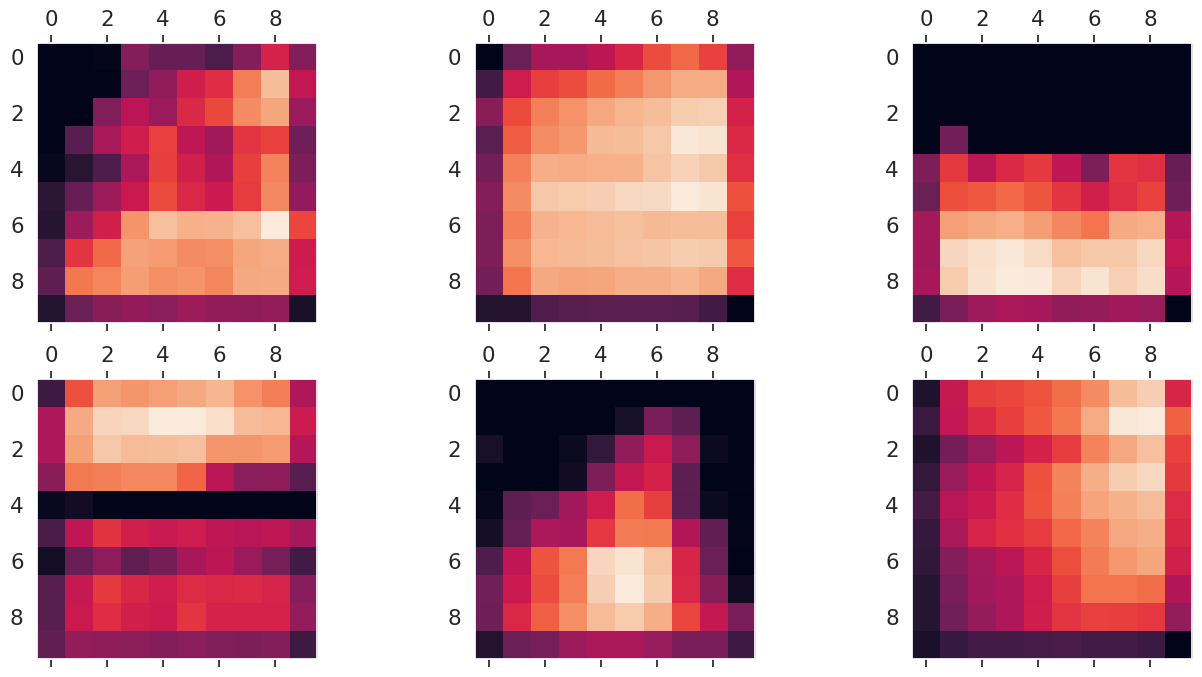

In [ ]:
plot_gradcam_spectrogram(2, 3, x_train, classical[0][:6], model, 'max_pooling2d_2')

GRAD-CAM Heatmaps for Incorrectly Classified Classical Genre

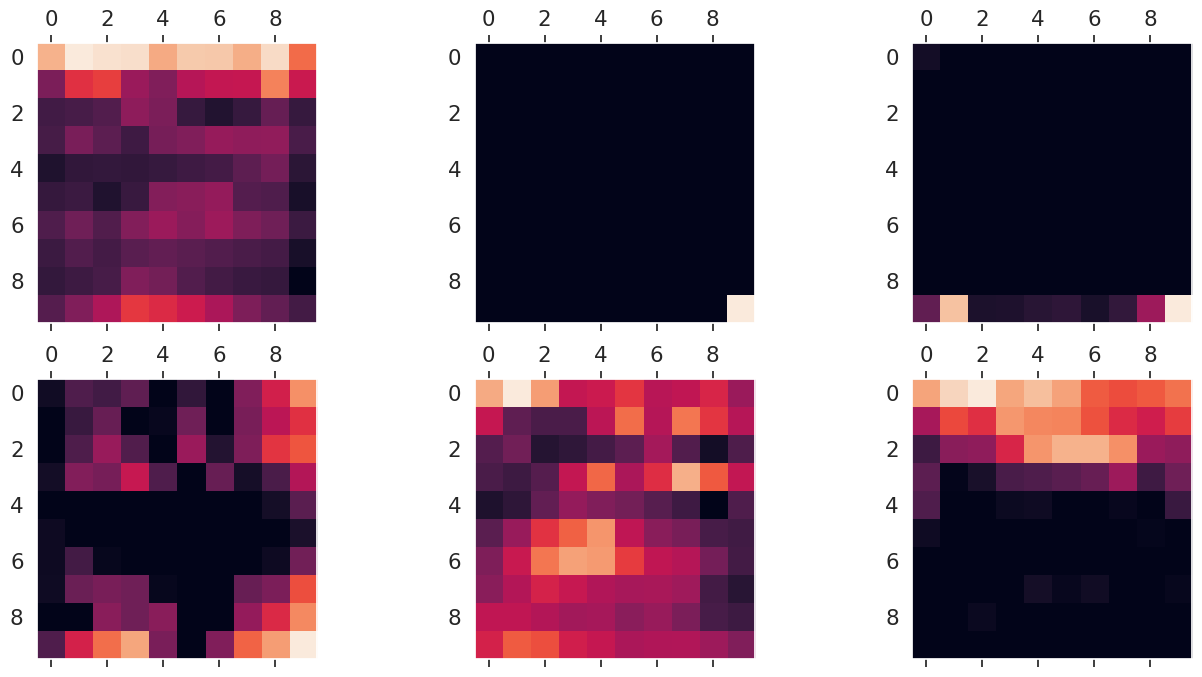

In [ ]:
plot_gradcam_spectrogram(2, 3, x_train, classical[1][:6], model, 'max_pooling2d_2')

## Disco Music

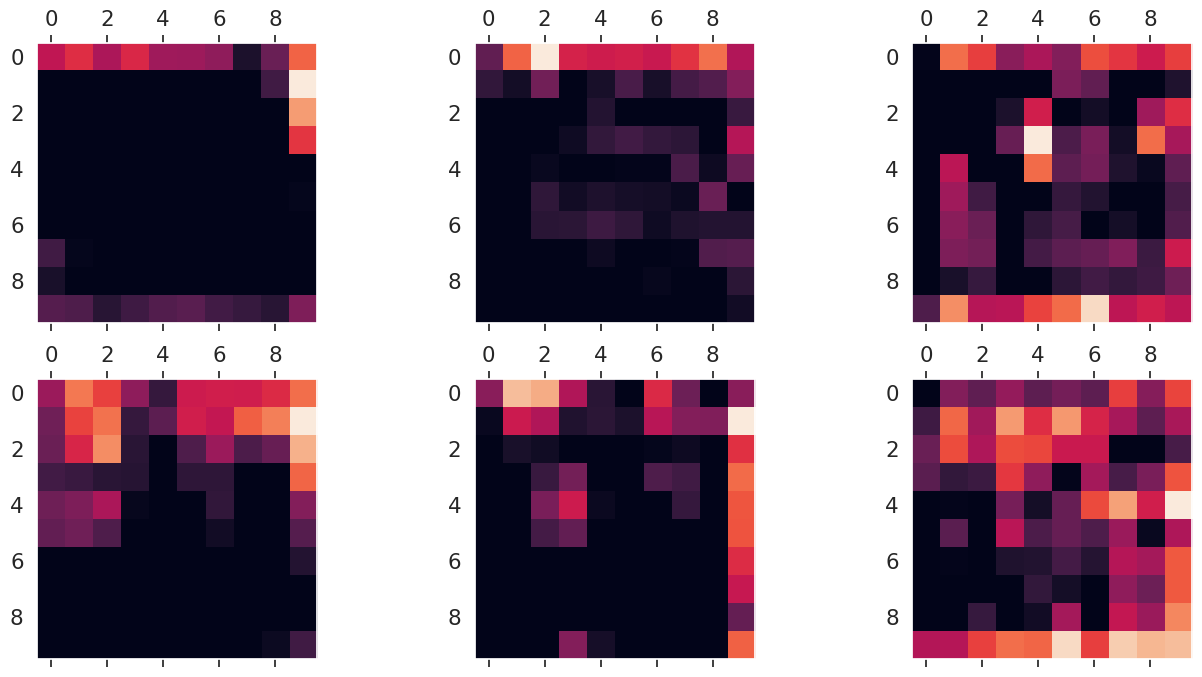

In [ ]:
plot_gradcam_spectrogram(2, 3, x_train, disco[0][:6], model, 'max_pooling2d_2')

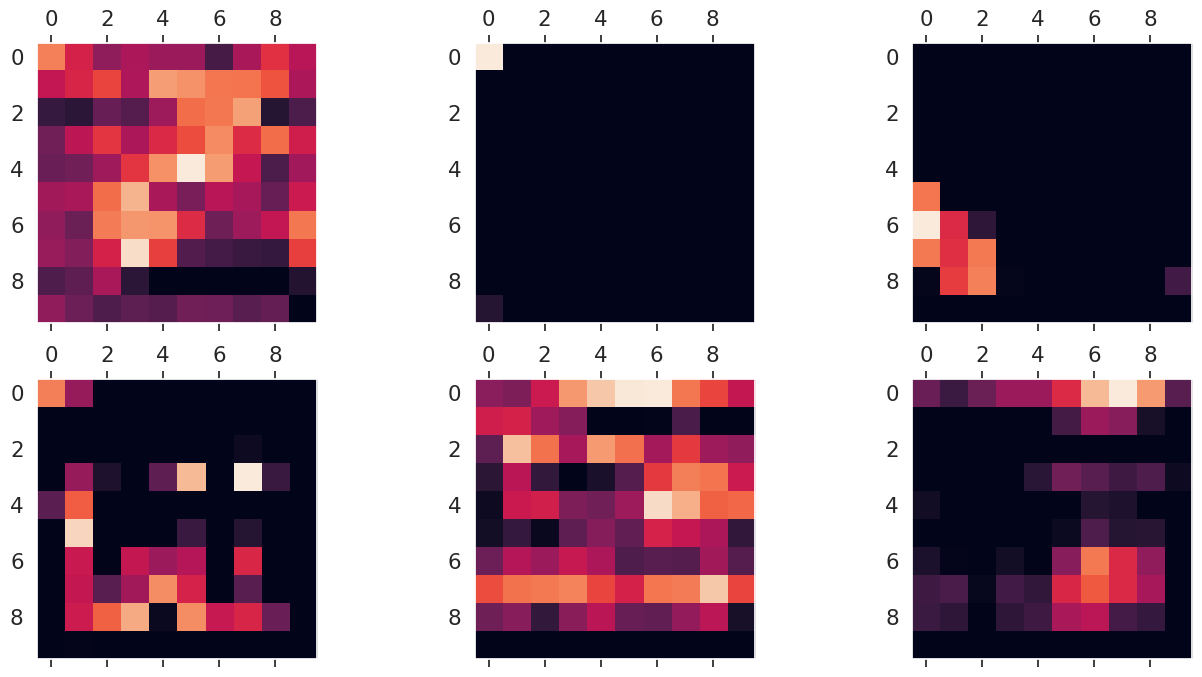

In [ ]:
plot_gradcam_spectrogram(2, 3, x_train, disco[1][:6], model, 'max_pooling2d_2')

## Metal Music

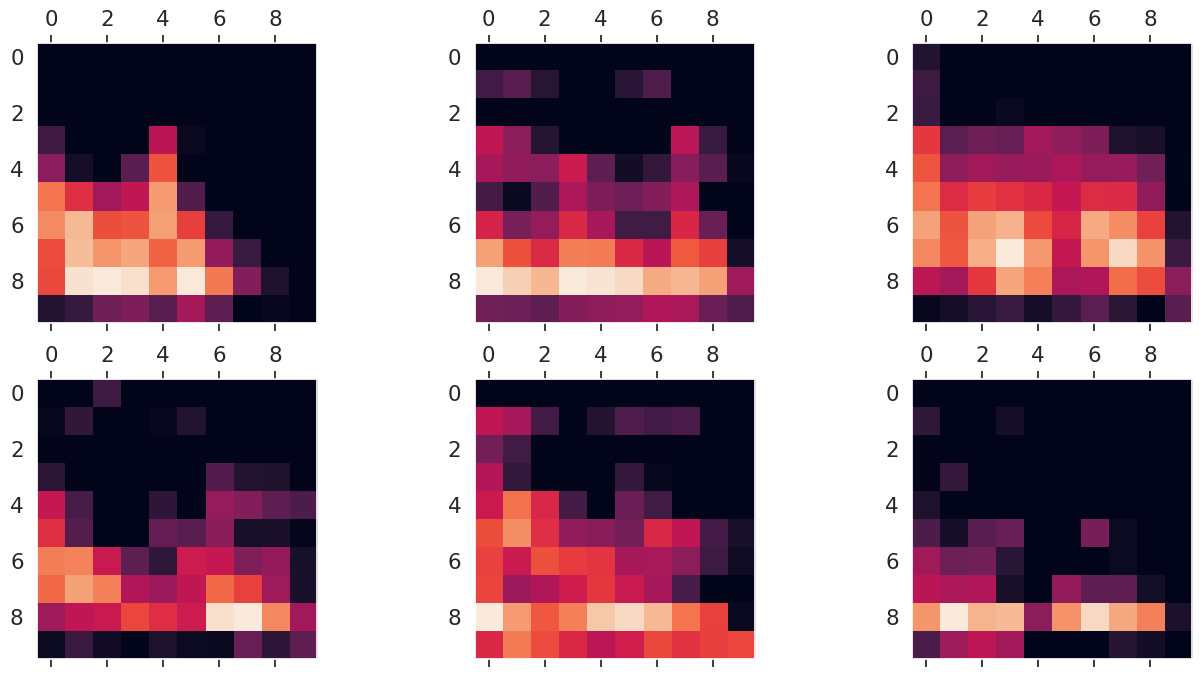

In [ ]:
plot_gradcam_spectrogram(2, 3, x_train, metal[0][:6], model, 'max_pooling2d_2')

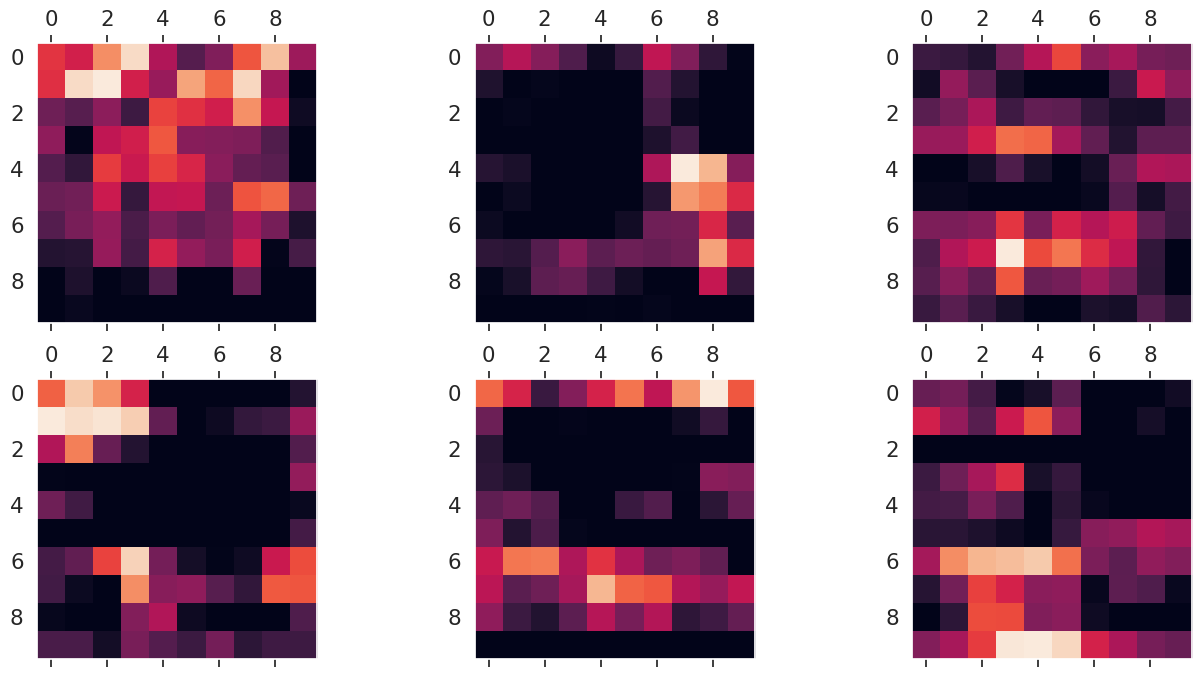

In [ ]:
plot_gradcam_spectrogram(2, 3, x_train, metal[1][:6], model, 'max_pooling2d_2')

## Rock Music

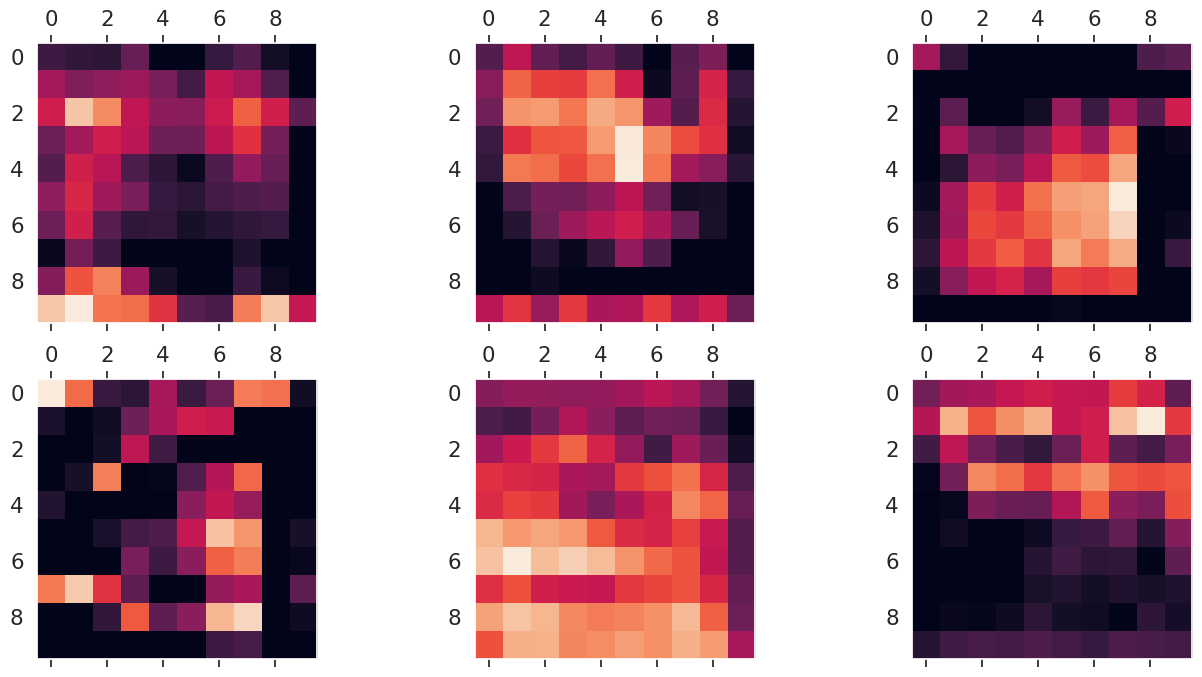

In [ ]:
plot_gradcam_spectrogram(2, 3, x_train, rock[0][:6], model, 'max_pooling2d_2')

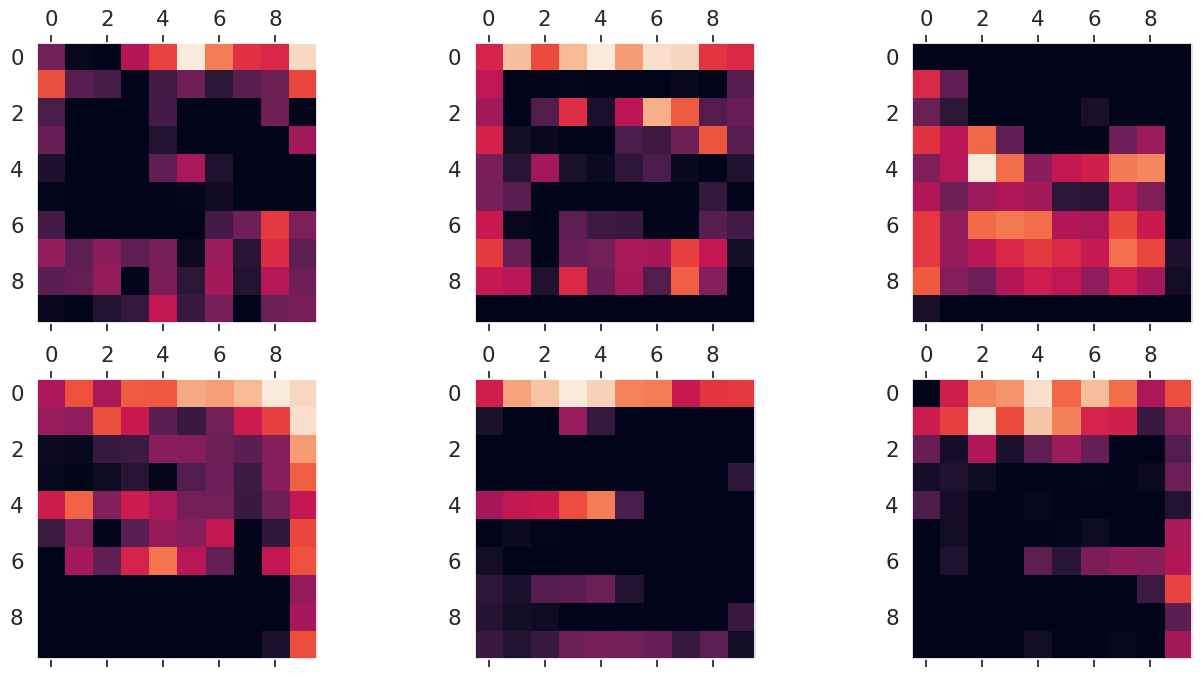

In [ ]:
plot_gradcam_spectrogram(2, 3, x_train, rock[1][:6], model, 'max_pooling2d_2')

**Comment on the heatmaps obtained. Do you observe differences among the heatmaps of different music genres? Can you understand why the model got some predictions wrong?**

A general trend we observe is that for the correctly classified examples, the heatmaps across all genres are more representative of the of the spectograms we plotted earlier (i.e. the input images). Whereas, for the incorrectly classified examples there are alot of blank/black spaces in the heatmaps which does not give a lot of information about the underlying structure/pattern in the data. This tells us that the model has determined that in these blank/black regions don't contribute much to the predictions of the model.

**Differences among heatmaps accross genres:** Among different music genres, the heatmaps obtained for classical music seem to be in a pattern with respect to the intensity of the sqaures. In the classical genre, for the correct predictions we observe a radial gradient of sorts, where the centre portion is lighter (almost white) and slowly getting darker in a radial manner outwards.

The disco music heatmaps seem slightly pattern-less, there is no apparent pattern of the heatmap squares, but in general they seem to be concentrated more towards the edges in 4 out of the 6 correct predictions.

The metal music heatmaps have relatively more pattern than disco music, and mostly the model finds more relevant information from the bottom left (or the entire bottom) area of the heatmaps (in the correctly predicted observations).

The rock music heatmaps show that mostly the model finds relevant information from nearly all regions of the mel spectograms. It is much more spread out than metal and disco.

Overall, the classical music heatmaps seem to have the most apparent pattern, and we can somewhat see similarities between the correctly predicted observation heatmaps and the mel spectograms of those examples.

**Reasons for wrong predictions:** As mentioned earlier, we see a usual pattern of blank spaces (in some observations entirely blank heatmaps) in the wrongly predicted training examples. This means that for those examples the model is unable to find useful information for predcition in most of the regions in those images. Clearly in the misclassified examples, the heatmaps after the last maxpooled layer are very unrepresentative of the real mel spectograms of these observations that we saw above.
This is probably why they got misclassified. It is possible that there was a loss of information due to repeated maxpooling, which is why the model was not able to classify the inputs from the maxpooled layer correctly.

For example, in the classical genre for the incorrectly classified examples heatmaps, we see the top right 2 heatmaps to be almost completely black.

## **P1-6**

**Comment on the previous question: what are your thoughts about the applicability of the Grad-CAM tool on these data?**

The Grad-CAM tool is a technique for understanding where a CNN model is focusing its attention when making predictions. It highlights the regions of the input data that are most influential in the model's decision-making process.

For music genre classification using Mel spectrograms, Grad-CAM can provide insights into which time-frequency components of the spectrograms are crucial for the model's predictions. By comparing Grad-CAM heatmaps across different genres, we can gain insights into genre-specific characteristics that influence the model's predictions. This can lead to a deeper understanding of the genre classification task and potentially reveal genre-specific patterns or features.

By visualizing the maps generated by Grad-CAM, we can debug models more effectively. We can identify cases where the model makes incorrect predictions and analyze which parts of the spectrogram are being misinterpreted, leading to potential insights for model improvement. Additionally, Grad-CAM not only highlights the important regions in the spectrogram but also localises these regions, providing spatial information about the features contributing to the model's predictions. This means that it not only identifies which regions are important but also precisely pinpoints where these regions are located within the spectrogram. Grad-CAM provides spatial information about the features contributing to the model's predictions. In spectrograms, this spatial information refers to the specific time and frequency bins within the spectrogram where the model focuses its attention. This can help identify specific patterns or characteristics in the spectrogram that are indicative of certain music genres.

However, these heatmaps obtained can be difficult to interpret. Since mel spectograms are not straightforward images which are recognisable and interprettable by us, for example those of a cat, dog or handwritten digits like in the MNSIT dataset, analysing heatmaps becomes a challenge. For tasks like object classification (e.g., distinguishing between cats and dogs), Grad-CAM can effectively pinpoint features such as ears, eyes, noses, etc., that the model uses for classification.
But, our data has Mel spectrograms that represent audio data in a visual format, providing information about the frequency content of the audio signal over time. Unlike regular images such as cat/dog images, interpreting spectrograms directly is more challenging, as they represent complex audio features. Grad-CAM on Mel spectrograms can still highlight relevant regions, but the interpretation may not be as straightforward as with images. It might not highlight recognizable features like ears or eyes, but rather focus on frequency bands and temporal patterns. Understanding the relevance of highlighted regions in spectrograms may also require domain knowledge in audio signal processing and music analysis.

In summary, while Grad-CAM can still be applied to Mel spectrogram data, the ease of interpretation is not that great such as that in cats, dogs, or MNSIT image datasets. Grad-CAM's applicability in image data is generally more straightforward due to the visual nature of the input, while its interpretation in Mel spectrogram data may require additional domain knowledge.


## **P2: Disentangling time and frequency**




The images we are using in this assignment are different from a usual picture: the x and y axes carry different meanings. A CNN architecture that takes into account differently the time and frequency components of the spectrograms is described as follows:

We make use of parallel convolutional pathways, similar to the inception module (InceptionV3) in the Inception architecture. This approach allows the model to learn both temporal and frequency features simultaneously through parallel convolutions of varying kernel sizes. We use the **Functional API** of Keras to implement this architecture.

The proposed architecture will consist of two parallel convolutional pathways, one for capturing temporal features and the other for capturing frequency features.

**Temporal features** in spectrogram data often correspond to short-duration patterns or changes in sound over time, e.g., transient sounds, rhythm, and temporal dynamics. Small kernel sizes, such as 2x2 are effective for capturing local temporal patterns and subtle changes within the spectrogram images. These kernels focus on capturing fine-grained details and short-term variations in the temporal dimension.
By using small kernels in the temporal pathway, the model can learn to detect and emphasize important temporal features, such as rapid changes in frequency components or short-duration events in the audio signal.

On the other hand, **Frequency features** in spectrogram data represent characteristics related to the distribution and intensity of different frequency components over time. Examples include harmonic structures, spectral peaks, and frequency modulations. Large kernel sizes, such as 7x7, are suitable for capturing broader frequency patterns and spatial relationships between frequency components within the spectrogram images. These kernels can effectively integrate information across multiple frequency bands and capture global frequency characteristics.
By using large kernels in the frequency pathway, the model can learn to detect and highlight important frequency features, such as harmonic relationships, spectral shapes, and overall spectral content present in the audio signal.

Keeping this information in mind, here is the proposed architecture:

1. **Input Layer**: The input layer takes spectrogram images with dimensions (time, frequency, channels).

2. **Parallel Convolutional Pathways**:
- The parallel pathways, each with a different kernel size is to capture features at different scales in both the time and frequency domains.
- We use kernel sizes of (2, 2) and (7, 7) to capture fine (time) and large-scale (frequency) features, respectively.

  - **Temporal Pathway**: Convolutional layers with small kernel sizes: Small kernel sizes (2x2) are effective for capturing local patterns and temporal features in the spectrogram images.
      
  - **Frequency Pathway**: Convolutional layers with larger kernel sizes: Larger kernel sizes (e.g. 7x7) are suitable for capturing broader frequency patterns and features in the spectrogram images.

3. **Pooling Layers**:
   - After each set of convolutional layers in each pathway, we'll add max pooling layers to downsample the feature maps and reduce spatial dimensions. We use a (2x2) Max Pooling layer.

3. **Concatenation**:
   - We will then concatenate the output feature maps from all parallel pathways along the channel axis to combine information learned from different kernel sizes.

4. **Flatten and Dense Layer**:
   - We then Flatten the concatenated feature maps and pass them through dense layers for further feature extraction and classification. We also use Dropouts, where we drop 30% of randomly selected neurons during training to prevent overfitting. We use a 50 neuron dense layer, with L2 regularization with learning rate of 0.001. We use the relu activation function in this layer.

5. **Output Layer**:
   - The final output layer will consist of neurons corresponding to the number of classes (i.e. 4 music genres) with softmax activation for multi-class classification.
We use the Schochastic Gradient Descent optimizer with batch size = 32 for training and train over 20 epochs. We also use the categorical cross-entropy loss function, which used for multi-class classification.

**Justification**:

- **Separate Pathways**: By having separate convolutional pathways for the time and frequency components, the model can effectively capture and learn distinct temporal and frequency features from the spectrograms. This allows the model to adaptively focus on different aspects of the data, enhancing its ability to discriminate between different classes.

- **Different Kernel Sizes**: Using different kernel sizes in each pathway allows the model to capture features at different scales. Smaller kernel sizes are more suitable for capturing fine-grained temporal patterns, while larger kernel sizes are better at capturing broader frequency patterns. This approach ensures that the model can effectively capture the diverse range of features present in the spectrogram data.

- **Combining Pathways**: By merging the feature maps from both pathways, the model can utilise the complementary information captured by each pathway. This integration of temporal and frequency features enables the model to make more informed and accurate predictions, leading to improved classification performance.

Overall, this architecture uses the characteristics of spectrogram data, where the x and y axes carry different meanings, and effectively leverages this information to perform accurate classification tasks.

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import RMSprop

# Input layer
inputs = Input(shape=(80, 80, 1))

# Parallel convolutional pathways
conv_2x2 = Conv2D(16, (2, 2), padding='same', activation='relu')(inputs)
conv_7x7 = Conv2D(16, (7, 7), padding='same', activation='relu')(inputs)

# Max pooling layers
pool_2x2 = MaxPooling2D((2, 2))(conv_2x2)
pool_7x7 = MaxPooling2D((2, 2))(conv_7x7)

# Concatenate feature maps from all pathways
concatenated = Concatenate(axis=-1)([pool_2x2, pool_7x7])

# Flatten and dense layers
flattened = Flatten()(concatenated)
dropout = Dropout(0.3)(flattened)
dense_1 = Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.001))(flattened)
outputs = Dense(4, activation='softmax')(dense_1)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer= 'sgd', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 80, 80, 1)]          0         []                            
                                                                                                  
 conv2d_52 (Conv2D)          (None, 80, 80, 16)           80        ['input_15[0][0]']            
                                                                                                  
 conv2d_53 (Conv2D)          (None, 80, 80, 16)           800       ['input_15[0][0]']            
                                                                                                  
 max_pooling2d_47 (MaxPooli  (None, 40, 40, 16)           0         ['conv2d_52[0][0]']           
 ng2D)                                                                                      

In [ ]:
history2 = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data = (x_val, y_val))

Epoch 1/20
124/124 [==============================] - 2s 8ms/step - loss: 0.8698 - acc: 0.6696 - val_loss: 0.7155 - val_acc: 0.7664
Epoch 2/20
124/124 [==============================] - 1s 7ms/step - loss: 0.6341 - acc: 0.7734 - val_loss: 0.6714 - val_acc: 0.7595
Epoch 3/20
124/124 [==============================] - 1s 7ms/step - loss: 0.5361 - acc: 0.8194 - val_loss: 0.5613 - val_acc: 0.8078
Epoch 4/20
124/124 [==============================] - 1s 7ms/step - loss: 0.4949 - acc: 0.8414 - val_loss: 0.5659 - val_acc: 0.8044
Epoch 5/20
124/124 [==============================] - 1s 7ms/step - loss: 0.4209 - acc: 0.8722 - val_loss: 0.5614 - val_acc: 0.8159
Epoch 6/20
124/124 [==============================] - 1s 6ms/step - loss: 0.3667 - acc: 0.8964 - val_loss: 0.5107 - val_acc: 0.8446
Epoch 7/20
124/124 [==============================] - 1s 6ms/step - loss: 0.3358 - acc: 0.9091 - val_loss: 0.4545 - val_acc: 0.8654
Epoch 8/20
124/124 [==============================] - 1s 7ms/step - loss: 0.

Text(0.5, 0.98, 'Music Genre Classification')

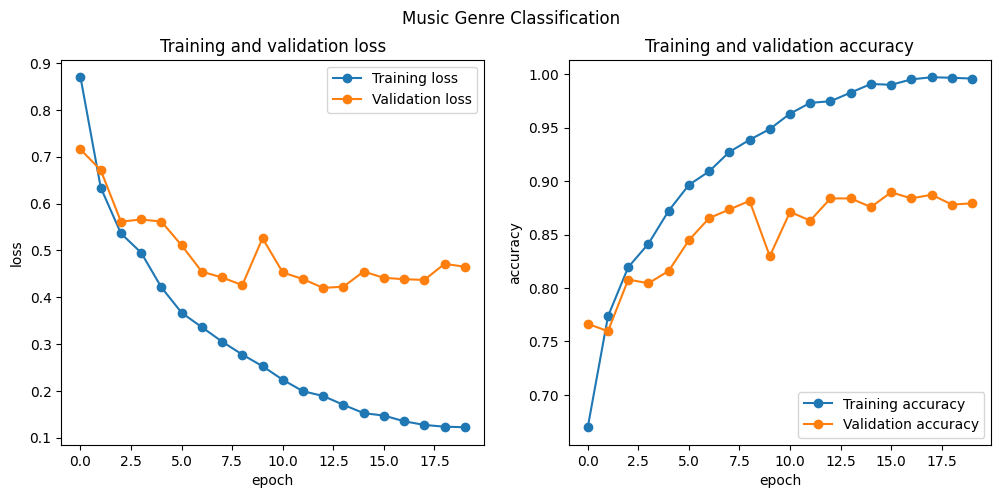

In [ ]:
# training and validation loss
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(history2.history['loss'],'-o', label='Training loss')
ax1.plot(history2.history['val_loss'],'-o', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(loc='upper right')
ax2.plot(history2.history['acc'],'-o', label='Training accuracy')
ax2.plot(history2.history['val_acc'],'-o', label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(loc='lower right')
f.suptitle('Music Genre Classification')

In [ ]:
# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]
# print test accuracy
print('Test accuracy %.2f%%' % accuracy)

Test accuracy 90.44%


We can observe that the model performs well on the test data, infact it has a better accuracy (90.44%) as compared to our previous model (87.37%) on the test data. However, seeing the validation and train data accuracy and loss plots, we can tell that there is overfitting in the model. This is due to the large number of parameters we trained and the limited number of training examples we had as compared to the parameters. To address this problem we can implement Data Augmentation on the training data to expland it and mitigate overfitting. We can also consider reducing the number of parameters and layers in the CNN. However, this CNN architecture was for demonstration purposes and shows how the x and y axis elements can be treated differently since they have different meanings. This is why the number of parameters are high in this model which has led to an overfit model.

37/37 [==============================] - 0s 2ms/step


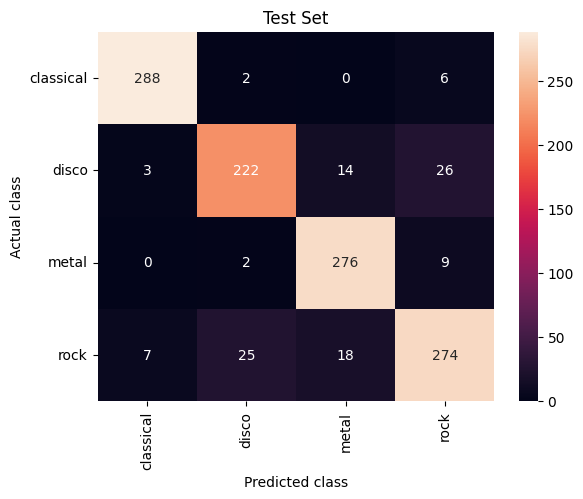

In [ ]:
predictions = model.predict(x_test)
plt.title("Test Set")
plot_confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), classes)
plt.show()

124/124 [==============================] - 1s 3ms/step


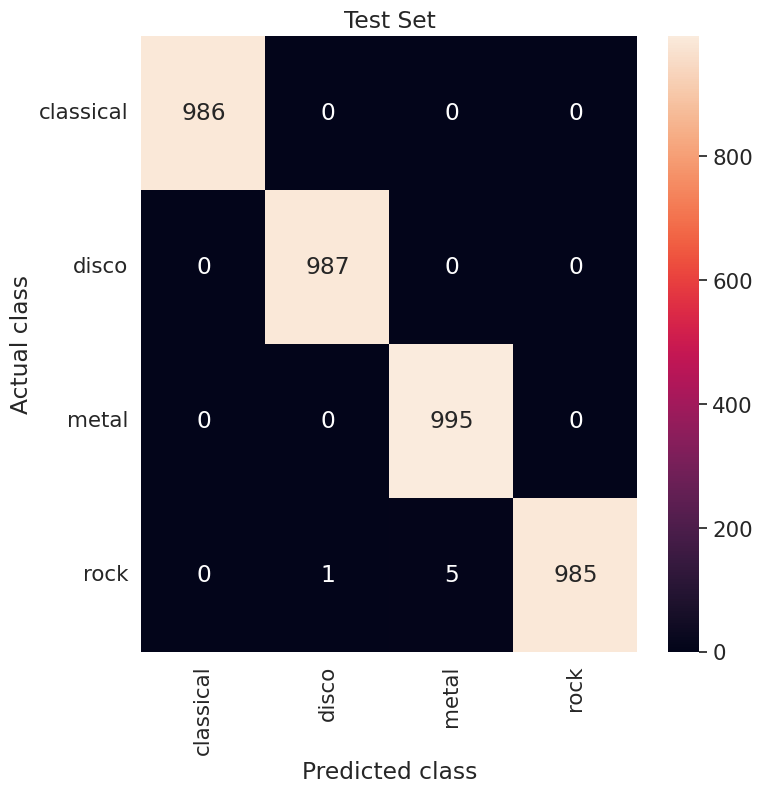

In [ ]:
predictions = model.predict(x_train)
plt.title("Test Set")
plot_confusion_matrix(np.argmax(y_train, axis=1), np.argmax(predictions, axis=1), classes)
plt.show()